# Análisis exploratorio de Netflix
Desarrollar una plataforma de streaming requiere, principalmente, de productos que no son propios de la empresa, sino que adquieren los derechos de innumerables películas y series.

En este notebook, tomando de referencia a Netflix, busco dar respuestas a:
* Proporción de géneros
* Proporción de películas y series
* Proporción de rangos de edad
* Proporción de producciones por país de origen
* Proporción de producciones en función del año de la producción

### Netflix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r netflix
%store -r netflix_edades

In [2]:
netflix.head()

,title,type,release_year,age_certification,genero,production_countries
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,documentation,US
1,Taxi Driver,MOVIE,1976,R,drama,US
1,Taxi Driver,MOVIE,1976,R,crime,US
2,Deliverance,MOVIE,1972,R,drama,US
2,Deliverance,MOVIE,1972,R,action,US


In [3]:
anio=netflix['release_year'].value_counts().rename_axis("year").reset_index(name="total")
anio

,year,total
0,2019,2063
1,2021,1967
2,2018,1949
3,2020,1890
4,2017,1483
...,...,...
58,1959,3
59,1978,3
60,1973,2
61,1985,1


In [4]:
anio.to_csv(r'C:\Users\b2bch\OneDrive\Escritorio\movies\src.data\anio_netf.csv', index = False)
#para utilizarla en tableau

In [5]:

anio=anio[0:10]

In [6]:

m_labels5 =anio.year
m_values5= anio.total

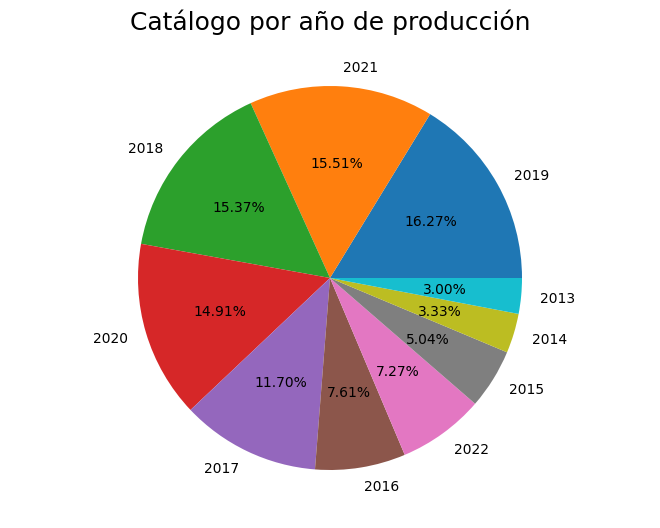

In [7]:
fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
plt.title('Catálogo por año de producción', fontsize=18)
ax.pie(m_values5, labels=m_labels5, autopct='%1.2f%%')
plt.show()

<AxesSubplot:title={'center':'Boxplot del catálogo por año de producción'}>

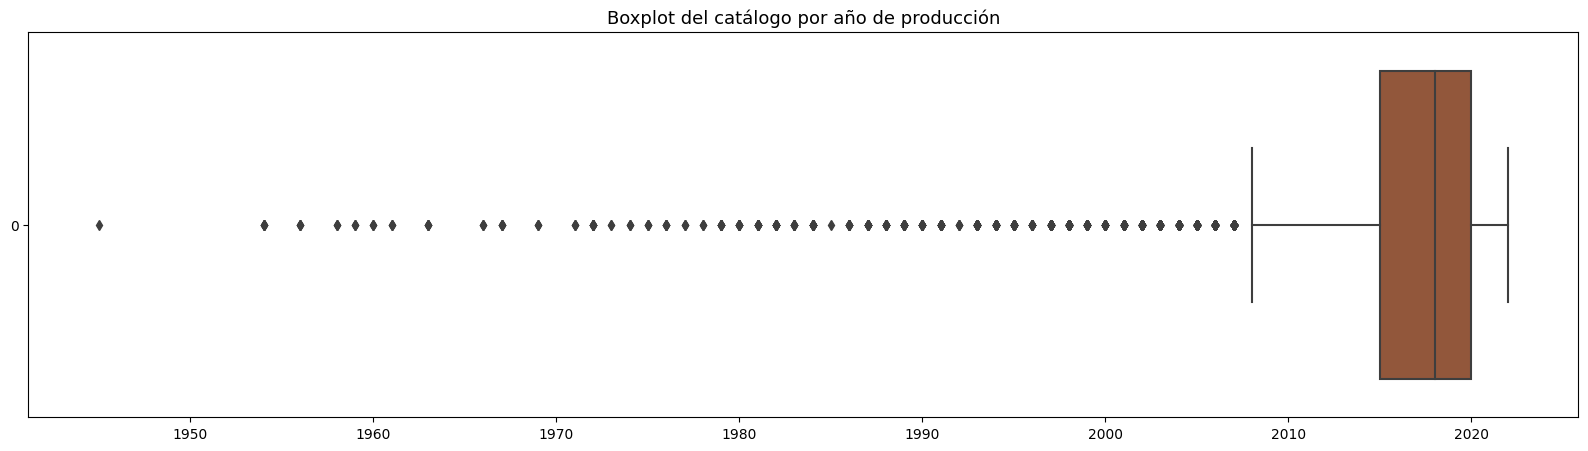

In [8]:
plt.figure(figsize=(20,5))
plt.title('Boxplot del catálogo por año de producción', fontsize=13)

sns.boxplot(netflix["release_year"], color="sienna", orient="h")

In [9]:
#El catálogo es principalmente actual. El contenido anterior a 2010 es más escaso,  son
#outliers.En este caso podemos encontrar peliculas famosas o de culto: Taxi Driver o Deliverance

In [10]:
netflix[netflix.release_year < 2010]

,title,type,release_year,age_certification,genero,production_countries
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,documentation,US
1,Taxi Driver,MOVIE,1976,R,drama,US
1,Taxi Driver,MOVIE,1976,R,crime,US
2,Deliverance,MOVIE,1972,R,drama,US
2,Deliverance,MOVIE,1972,R,action,US
...,...,...,...,...,...,...
636,To and from New York,MOVIE,2006,NaN,,US
637,Osuofia in London 2,MOVIE,2004,NaN,,XX
638,Brother's Shadow,MOVIE,2006,NaN,drama,US
639,Rabun,MOVIE,2003,NaN,drama,MY


In [11]:
contenido = netflix['type'].value_counts().rename_axis("tipo").reset_index(name="total")
contenido

,tipo,total
0,MOVIE,9224
1,SHOW,5923


In [12]:
m_labels =contenido.tipo
m_values= contenido.total


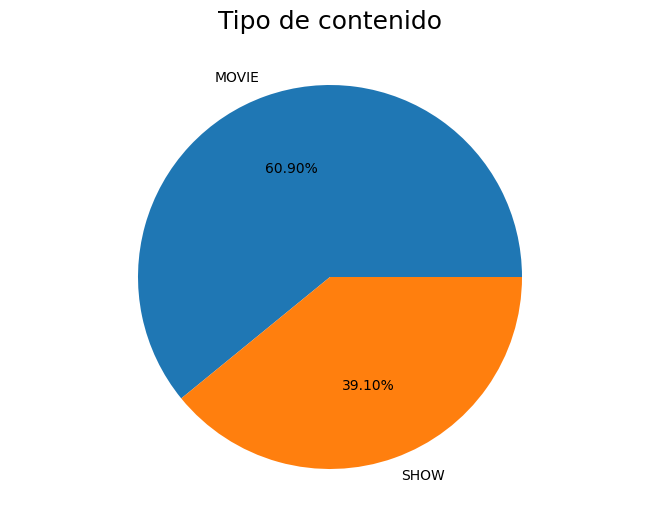

In [13]:
fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
plt.title('Tipo de contenido', fontsize=18)
ax.pie(m_values, labels=m_labels, autopct='%1.2f%%')
plt.show()

In [14]:
edades2 = netflix_edades['age_certification'].value_counts().rename_axis("rangos").reset_index(name="total") #utilizamos el dataframe que no contiene Nan en la certificación por edad
edades2

,rangos,total
0,+18,3984
1,TP,2661
2,+13,2653


In [15]:
m_labels2 =edades2.rangos
m_values2= edades2.total

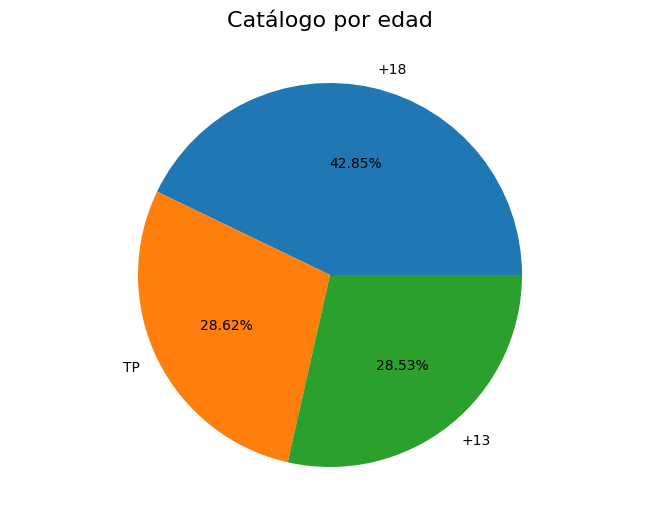

In [16]:
fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
plt.title('Catálogo por edad', fontsize=16)
ax.pie(m_values2, labels=m_labels2, autopct='%1.2f%%')
plt.show()

In [17]:
genres_count = netflix['genero'].value_counts()
genres_count = genres_count[:10,]
genres_count.index[0:10]


Index(['drama', 'comedy', 'thriller', 'action', 'romance', 'documentation',
       'crime', 'animation', 'family', 'fantasy'],
      dtype='object')

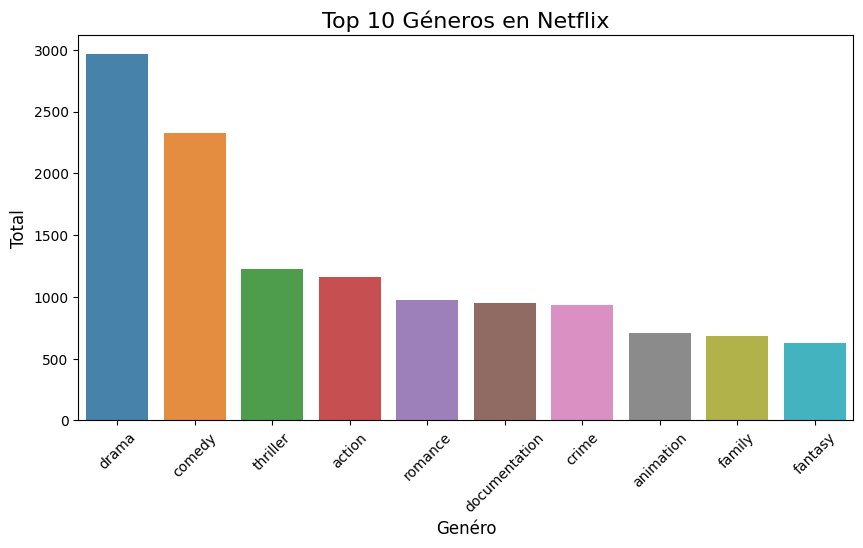

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=genres_count.index, y=genres_count.values, alpha=0.9)
plt.title('Top 10 Géneros en Netflix', fontsize=16)
plt.ylabel('Total', fontsize=12)
plt.xlabel('Genéro', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [19]:
country_count = netflix["production_countries"].value_counts()
country_count = country_count[:5,]
country_count

US    4802
IN    1597
JP    1027
KR     664
GB     573
Name: production_countries, dtype: int64

In [20]:
origen = netflix['production_countries'].value_counts().rename_axis("sub_cat_values").reset_index(name="counts") #utilizamos el dataframe que no contiene Nan en la certificación por edad
origen=origen[0:6]
origen

,sub_cat_values,counts
0,US,4802
1,IN,1597
2,JP,1027
3,KR,664
4,GB,573
5,ES,482


In [21]:
m_labels3 =origen.sub_cat_values
m_values3= origen.counts

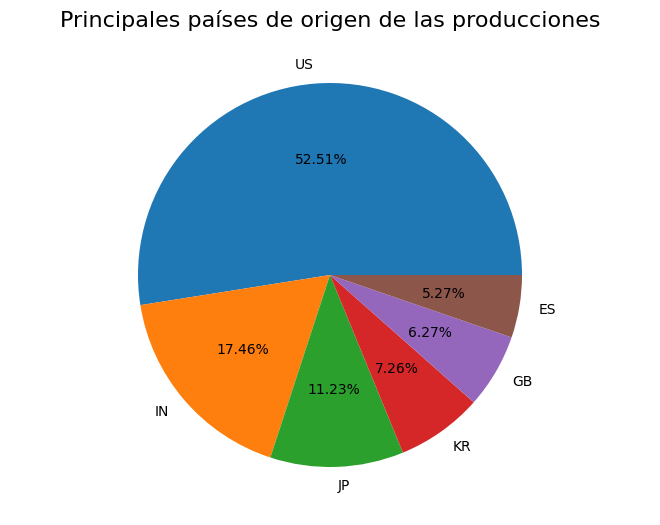

In [22]:
fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
plt.title('Principales países de origen de las producciones', fontsize=16)

ax.pie(m_values3, labels=m_labels3, autopct='%1.2f%%')
plt.show()